# Donovan Feist, u0924825, CH EN 2450

# Homework 6: Linear Least-Squares Regression

## Problem 1

We saw in class how to derive the regression equations for a straight line and for a second order polynomial.
Here, you will derive the equations for a polynomial of degree 3. Consider N data points $x_i$ and $y_i$.
We wish to fit a model that has the form: $y=a_0+a_2x^2+a_3x^3$.

### 1.1

Write the least squares error $S = \sum(y_i-f_i)^2$ and identify the unknown quantities.

The model we are asked to follow is $y=a_0+a_2x^2+a_3x^3$, which equals $f_i$. This means that $S = \sum(y_i-f_i)^2$ becomes \begin{array}{lcl} S = \sum(y_i-a_0-a_2x_i^2-a_3x_i^3)^2 \end{array}

and the unknown quantities are \begin{array}{lcl} a_0, a_2, and\space a_3 \end{array}.

### 1.2

What are the conditions for which S is a minimum?

\begin{array}{lcl} S\space is\space a\space minimum\space iff \space\space\space \begin{cases}
\frac{\partial S}{\partial a_0}=0\\
\frac{\partial S}{\partial a_2}=0\\
\frac{\partial S}{\partial a_3}=0. \end{cases} \end{array}

### 1.3

In light of the previous question, write the system of linear equations that must be solved
to find the unknown quantities.

\begin{array}{lcl}
\frac{\partial S}{\partial a_0}=0 \Rightarrow \frac{\partial S}{\partial a_0}=-2\sum(y_i-a_0-a_2x_i^2-a_3x_i^3)=0\\
\frac{\partial S}{\partial a_2}=0 \Rightarrow \frac{\partial S}{\partial a_2}=-2\sum x_i^2(y_i-a_0-a_2x_i^2-a_3x_i^3)=0\\
\frac{\partial S}{\partial a_3}=0 \Rightarrow \frac{\partial S}{\partial a_3}=-2\sum x_i^3 (y_i-a_0-a_2x_i^2-a_3x_i^3)=0. \end{array}

## Problem 2

The heat capacity $C_p$ is the number of heat units needed to raise the temperature of 1 kg of matter by one
degree. The heat capacity of a gas at various temperatures T is given by the following data:


| Cp (J/kg/K) | -50  | -30  | 0    | 60   | 90   | 110  |
|-------------|------|------|------|------|------|------|
| T(K)        | 1270 | 1280 | 1350 | 1480 | 1580 | 1700 |


### 2.1

Perform a straight line fit for the data in Table 1 and plot your fit on top of the original data.
Comment on your results. It is best to show the input data as dots on the plot to distinguish
between your fit and the original data.

In [45]:
Cp=[-50,-30,0,60,90,110]
T=[1270,1280,1350,1480,1580,1700]

N=len(T)

sumT=0
for i in range(0, len(T)):
    sumT=sumT+T[i]

sumT_squared=0
for i in range(0, len(T)):
    sumT_squared=sumT_squared+(T[i])**2

sumCp=0
for i in range(0, len(Cp)):
    sumCp=sumCp+Cp[i]

sumTCp=0
for i in range(0, len(T)):
    sumTCp+=T[i]*Cp[i]
    
import numpy as np

A=np.array([[N,sumT],[sumT,sumT_squared]])
#print(A)
b=np.array([[sumCp],[sumTCp]])
#print(b)
sol=np.linalg.solve(A,b)
#print(sol)
print("Using a linear model yields: a_0=", sol[0,0], "and a_1=", sol[1,0])

Using a linear model yields: a_0= -506.95814977973737 and a_1= 0.3720264317180628


The calculations above lead to a line that fits the data having the equation: \begin{array}{lcl} f_i=-506.96+0.37x_i. \end{array}

Superimposing this line on the original data yields:

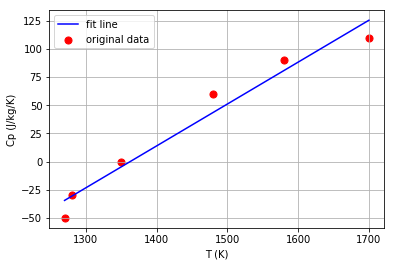

In [46]:
f_i=[]
for i in range(0,len(T)):
    f_i.append(sol[0,0]+sol[1,0]*T[i])
    #print(f_i)
#print(f_i)

import matplotlib.pyplot as plt
plt.xlabel("T (K)") # set x label
plt.ylabel("Cp (J/kg/K)") # set y label
plt.scatter(T,Cp,s=50,c="red",label="original data")
plt.plot(T,f_i,"b-",label="fit line")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes
plt.show()

The fit line matches the original date with fairly good accuracy. The most obvious outlier would be the data point (1270, -50). There is, however, a slight trend in the data that indicates the data is appoaching a maximum, suggesting that a quadridic fit might be more appropriate.

### 2.2

Perform a quadratic fit for the data in Table 1 and plot your quadratic fit on top of the original
data as well as the straight line fit. Comment on your results. You can either use the Normal
equations or the standard form to fit the data.

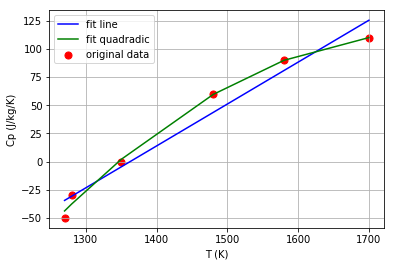

In [48]:
sumT_cubed=0
for i in range(0, len(T)):
    sumT_cubed+=(T[i])**3
    
sumT_to4=0
for i in range(0, len(T)):
    sumT_to4+=(T[i])**4
    
sumTto2Cp=0
for i in range(0, len(T)):
    sumTto2Cp+=Cp[i]*(T[i])**2

A2=np.array([[N,sumT,sumT_squared],[sumT,sumT_squared,sumT_cubed],[sumT_squared,sumT_cubed,sumT_to4]])
#print(A2)
b2=np.array([[sumCp],[sumTCp],[sumTto2Cp]])
#print(b2)
sol2=np.linalg.solve(A2,b2)
#print(sol2)

f2_i=[]
for i in range(0,len(T)):
    f2_i.append(sol2[0,0]+sol2[1,0]*T[i]+sol2[2,0]*(T[i])**2)
    #print(f2_i)
#print(f2_i)

plt.xlabel("T (K)") # set x label
plt.ylabel("Cp (J/kg/K)") # set y label
plt.scatter(T,Cp,s=50,c="red",label="original data")
plt.plot(T,f_i,"b-",label="fit line")
plt.plot(T,f2_i,"g-",label="fit quadradic")
plt.legend() # display legend
plt.grid(True,which="major") # turn on major grid axes
plt.grid(True,which="minor") # turn on minor grid axes
plt.show()



### 2.3

Based on the plots, which fit do you expect to be a more accurate model of the data? What
number can quantify which curve is a better fit? Compute that number and compare it for both fits.

Based on the plots, the quadradic fit is a more accurate model.

A number that can quantify which cure is a better fit is the $R^2$ value.

In [49]:
yavg=1/len(T)*sumCp

#computing the R^2 value for the line fit
top=0
for i in range(0,len(T)):
    top+=(Cp[i]-f_i[i])**2
bottom=0
for i in range(0,len(T)):
    bottom+=(Cp[i]-yavg)**2
R2line=1-top/bottom
#print(R2line)

#computing the R^2 value for the quadradic fit
top=0
for i in range(0,len(T)):
    top+=(Cp[i]-f2_i[i])**2
R2quad=1-top/bottom
#print(R2quad)

print("The R-squared values for the linear model and the quadradic model are",R2line, "and",R2quad,"\nrespectively.")

The R-squared values for the linear model and the quadradic model are 0.9607838580608656 and 0.9953673987441971 
respectively.


The closer to 1 an $R^2$ value is, the better a fit the model is. Because the $R^2$ value for the quadradic model is closer to 1 than the $R^2$ value of the linear model, we can conclude that the quadradic model is indeed more accurate.

## Problem 3

The growth rate k (# bacteria per day), of a certain bacteria is reported as a function of oxygen concentration
c (mg/L) (see Table 2 for date). It is known that such data can be modeled by the following equation: \begin{array}{lcl} k=\frac{k_{max}c^2}{c_s+c^2} \end{array}

where $c_s$ and $k_{max}$ are to be determined. We plan on using linear least-squares regression to fit this model
to the data in Table 2.

### 3.1

Use algebraic manipulation to transform this equation into a form suitable for regression
to a straight line of the form: $y = a_0+a_1x$. (HINT: what happens if you take the reciprocal, 1/k,
of the model given in equation 2?)

We begin with \begin{array}{lcl} k=\frac{k_{max}c^2}{c_s+c^2}. \end{array}

Taking the reciprocal yeilds \begin{array}{lcl} \frac{1}{k}=\frac{c_s+c^2}{k_{max}c^2}. \end{array}

Separating the fraction on the right hand side into two fractions yields \begin{array}{lcl} \frac{1}{k}=\frac{c_s}{k_{max}c^2}+\frac{1}{k_{max}}. \end{array}

Rearanging and separating the fractions yields \begin{array}{lcl} \frac{1}{k}=\frac{1}{k_{max}}+\frac{c_s}{k_{max}}\times \frac{1}{c^2}. \end{array}

Looking at the model this way, $\frac{1}{k}$ represents $y$, $\frac{1}{k_{max}}$ represents $a_0$, $\frac{c_s}{k_{max}}$ represents $a_1$, and $\frac{1}{c^2}$ represents $x$.

### 3.2

Write down the linear system of equations that you need to solve to find $a_0$ and $a_1$. Use
either the normal equations or the traditional form.

\begin{array}{lcl} S=\sum(y_i-f_i)^2 \Rightarrow S=\sum(y_i-a_0-a_1x)^2 \end{array}

\begin{array}{lcl} S\space is\space a\space minimum\space iff \space\space\space \begin{cases}
\frac{\partial S}{\partial a_0}=0\\
\frac{\partial S}{\partial a_1}=0 \end{cases} \Rightarrow \end{array}

\begin{array}{lcl}
\frac{\partial S}{\partial a_0}=-2\sum(y_i-a_0-a_1x_i)=0\\
\frac{\partial S}{\partial a_1}=-2\sum x_i(y_i-a_0-a_1x_i)=0. \end{array}

The two equations above can be manipulated and rearranged into the matricies
$$\begin{bmatrix}
N & \sum x_i\\
\sum x_i & \sum x_i^2
\end{bmatrix}
\begin{bmatrix}
a_0\\a_1
\end{bmatrix}=
\begin{bmatrix}
\sum y_i\\ \sum x_iy_i \end{bmatrix}$$


### 3.3

Solve the above system of equations for $a_0$ and $a_1$.

In [50]:
c=np.array([.5,.8,1.5,2.5,4.0])
k=np.array([1.1,2.4,5.3,7.6,8.0])

xi=1/c**2
#print(xi)

yi=1/k
#print(yi)

A=np.array([[len(c), np.sum(xi)],[np.sum(xi),np.sum((xi)**2)]])
#print(A)
b=np.array([[np.sum(yi)],[np.sum(xi*yi)]])
#print(b)
sol=np.linalg.solve(A,b)
#print(sol)

print("This leads to a_0 and a_1 equaling",sol[0,0],"and",sol[1,0],"respectively.")

This leads to a_0 and a_1 equaling 0.10363302535760648 and 0.2011175559544965 respectively.


With $\frac{1}{k_{max}}=a_0$, and $\frac{c_s}{k_{max}}=a_1$, this leads to $k_{max}=1/a_0$ and $c_s=a_1k_{max}=\frac{a_1}{a_0}$.

In [51]:
k_max=1/sol[0,0]
c_s=sol[1,0]/sol[0,0]

print("The values of k_max and c_s are",k_max,"and",c_s,"respectively.")

The values of k_max and c_s are 9.649433629379246 and 1.9406705078858808 respectively.


### 3.4

Compute the $R^2$ value for this fit and comment on your finding.

In [53]:
fi=sol[0,0]+sol[1,0]*xi
#print(fi)
#print(yi)

yavg=1/len(yi)*np.sum(yi)
#print(yavg)

R2=1-(np.sum((yi-fi)**2))/(np.sum((yi-yavg)**2))
print("The R-squared value is", R2,".")

The R-squared value is 0.9997358177195926 .


The $R^2$ value extremely close 1, indicating that our original model $k=\frac{k_{max}c^2}{c_s+c^2}$ (of which our linear model, $\frac{1}{k}=\frac{1}{k_{max}}+\frac{c_s}{k_{max}}\times \frac{1}{c^2}$, is just a rearangement) is a very good model for the data.

### 3.5

For an oxygen concentraion of 2.1 mg/L, what is the bacterial growth rate?

In [54]:
def growthrate(concentration):
    f=k_max*concentration**2/(c_s+concentration**2)
    return f
growthrate(2.1)


6.700710145916321

When the oxygen concentration is 2.1 mg/L, the growth rate of bacteria is 6.7007 bacteria/day.